In [16]:
import networkx as nx
import matplotlib.pyplot as plt

Minimalan broj boja: 3
Bojenje grafa: {'A': 0, 'B': 1, 'C': 2, 'D': 0}


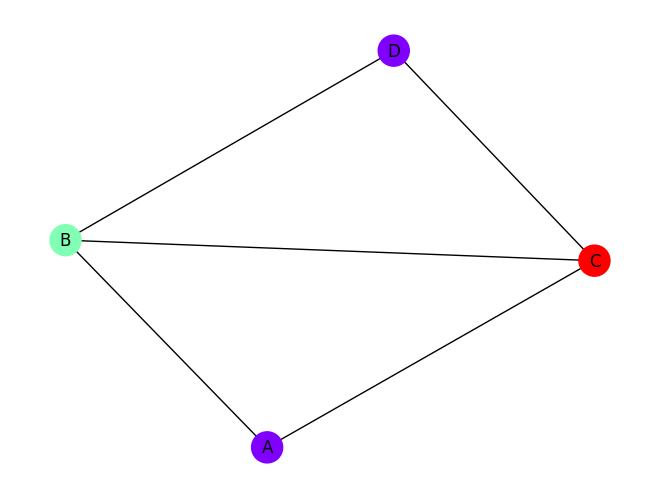

In [17]:
def brute_force_algorithm(graph):
    G = nx.Graph(graph)
    colors = {}  # Mapiranje boja za svaki čvor
    available_colors = set()  # Set dostupnih boja

    for node in G.nodes():
        # Pronalazak boja susednih čvorova
        neighbor_colors = {colors[neighbor] for neighbor in G.neighbors(node) if neighbor in colors}
        new_color = next((c for c in range(len(G)) if c not in neighbor_colors), len(G))  # Pronalazak nove boje

        colors[node] = new_color  # Bojenje čvora
        available_colors.add(new_color)  # Dodavanje boje u dostupne boje

    return len(available_colors), colors  # Vraćamo minimalan broj boja i mapiranje boja

# Primer grafa za testiranje
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D'],
    'D': ['B', 'C']
}

# Poziv funkcije za minimalno bojenje grafa
min_colors, coloring = brute_force_algorithm(graph)
print("Minimalan broj boja:", min_colors)
print("Bojenje grafa:", coloring)

G = nx.Graph(graph)
node_colors = [coloring[node] for node in G.nodes()]
pos = nx.spring_layout(G)  # Pozicije čvorova
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500)
plt.show()

Minimalan broj boja: 8
Bojenje grafa: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 0, 'F': 1, 'G': 2, 'H': 0, 'I': 1, 'J': 2, 'K': 3, 'L': 4, 'M': 5, 'N': 2, 'O': 3, 'P': 4, 'Q': 2, 'R': 3, 'S': 4, 'T': 2, 'U': 3, 'V': 5, 'W': 6, 'X': 7, 'Y': 2, 'Z': 4}


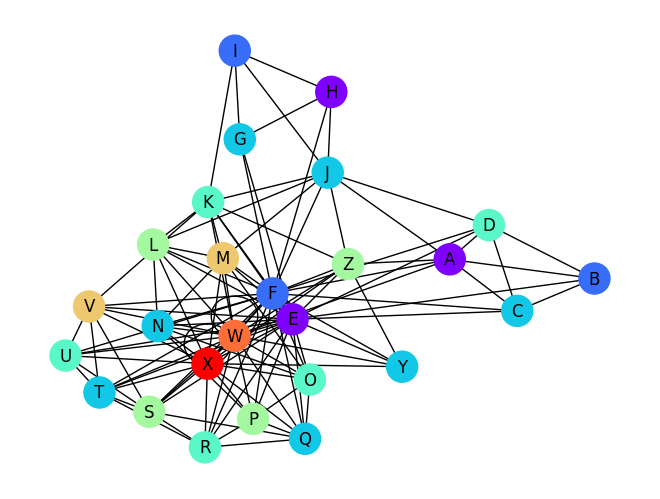

In [18]:
graph2 = {
    'A': ['B', 'C', 'D', 'J', 'W', 'Z', 'F'],
    'B': ['C', 'A', 'E', 'D'],
    'C': ['B', 'E', 'F', 'A', 'D'],
    'D': ['A', 'E', 'B', 'C', 'F'],
    'E': ['F', 'D', 'B', 'C', 'G'],
    'F': ['E', 'G', 'C', 'D', 'H', 'J', 'K', 'L'],
    'G': ['H', 'F', 'E', 'I'],
    'H': ['I', 'F', 'G', 'J'],
    'I': ['H', 'G', 'J', 'K'],
    'J': ['H', 'I', 'A', 'K', 'F', 'D', 'Z', 'M'],
    'K': ['L', 'I', 'J', 'M', 'F', 'E', 'W', 'V'],
    'L': ['K', 'J', 'M', 'N', 'F', 'E', 'W', 'X'],
    'M': ['K', 'N', 'L', 'O', 'F', 'E', 'W', 'X'],
    'N': ['M', 'L', 'O', 'P', 'F', 'E', 'W', 'X'],
    'O': ['N', 'M', 'P', 'Q', 'F', 'E', 'W', 'X'],
    'P': ['O', 'N', 'Q', 'R', 'F', 'E', 'W', 'X'],
    'Q': ['R', 'P', 'O', 'S', 'F', 'E', 'W', 'X'],
    'R': ['Q', 'P', 'S', 'T', 'F', 'E', 'W', 'X'],
    'S': ['R', 'Q', 'T', 'U', 'F', 'E', 'W', 'X'],
    'T': ['S', 'R', 'U', 'V', 'F', 'E', 'W', 'X'],
    'U': ['V', 'T', 'S', 'W', 'F', 'E', 'W', 'X'],
    'V': ['U', 'T', 'S', 'X', 'F', 'E', 'W', 'X'],
    'W': ['V', 'U', 'X', 'Y', 'F', 'E', 'W', 'X'],
    'X': ['W', 'V', 'Y', 'Z', 'F', 'E', 'W', 'X'],
    'Y': ['X', 'W', 'Z', 'F', 'E', 'W', 'X'],
    'Z': ['Y', 'X', 'J', 'F', 'E', 'W', 'K']
}
min_colors, coloring = brute_force_algorithm(graph2)
print("Minimalan broj boja:", min_colors)
print("Bojenje grafa:", coloring)

G = nx.Graph(graph2)
node_colors = [coloring[node] for node in G.nodes()]
pos = nx.spring_layout(G)  # Pozicije čvorova
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500)
plt.show()

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
Minimalno bojenje grafa: {'A': 2, 'B': 1, 'C': 3, 'D': 2}
Broj korišćenih boja: 3


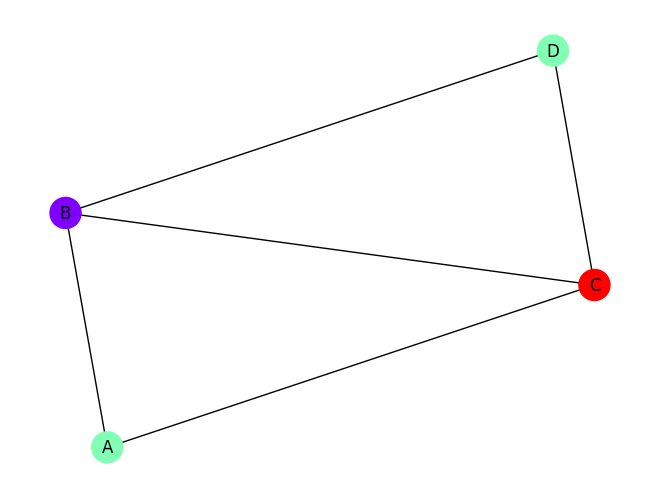

In [19]:
import random
import networkx as nx
import matplotlib.pyplot as plt

class Individual:
    def __init__(self, graph):
        self.graph = graph
        self.max_degree = max(d for _,d in G.degree())
        self.colors = self.initial_coloring()
        self.fitness = self.calc_fitness()

    # def is_feasible(self):
    #     for node in self.graph:
    #         for neighbor in self.graph[node]:
    #             if self.colors[node] == self.colors[neighbor]:
    #                 return False
    #     return True
        
        
    def initial_coloring(self):
        colors = {}
        # available_colors = set()
        # for node in self.graph:
        #     neighbor_colors = {colors[neighbor] for neighbor in self.graph[node] if neighbor in colors}
        #     color = 1
        #     while color in neighbor_colors:
        #         color += 1
        #     colors[node] = color
        #     available_colors.add(color)
       
        for node in self.graph:
            color = random.randint(1,self.max_degree + 1)
            colors[node] = color 
        return colors

    def calc_fitness(self):
        conflicts = 0  # Number of conflicts (adjacent nodes with the same color)
        num_colors = max(self.colors.values())
        
        for node in self.graph:
            for neighbor in self.graph[node]:
                if self.colors[node] == self.colors[neighbor]:
                    conflicts += 1
        
        # Fitness value is a combination of conflicts and number of colors used
        fitness = conflicts + (num_colors / self.max_degree)  # Adjust weights as needed
    
        return fitness

def is_feasible(individual):
        for node in individual.graph:
            for neighbor in individual.graph[node]:
                if individual.colors[node] == individual.colors[neighbor]:
                    return False
        return True

def crossover(parent1, parent2):
    child_colors = {}
    for node in parent1.colors:
        child_colors[node] = parent1.colors[node] if random.random() < 0.5 else parent2.colors[node]
    child = Individual(parent1.graph)
    child.colors = child_colors
    child.fitness = child.calc_fitness()
    return child

def mutation(individual):
    node = random.choice(list(individual.colors.keys()))
    neighbor_colors = {individual.colors[neighbor] for neighbor in individual.graph[node]}
    available_colors = set(range(1, len(individual.graph) + 1)) - neighbor_colors
    if available_colors:
        individual.colors[node] = random.choice(list(available_colors))
        individual.fitness = individual.calc_fitness()

def ga(graph, population_size, num_generations, tournament_size, elitism_size, mutation_prob):
    population = [Individual(graph) for _ in range(population_size)]
    
    for _ in range(num_generations):
        population.sort(key=lambda x: x.fitness)
        print(population[0].fitness)
        elites = population[:elitism_size]
        offspring = []
        
        for _ in range(population_size - elitism_size):
            parent1 = tournament_selection(population, tournament_size)
            parent2 = tournament_selection(population, tournament_size)
            child = crossover(parent1, parent2)
            if random.random() < mutation_prob:
                mutation(child)
            offspring.append(child)
        
        population = elites + offspring
    
    best_solution = min(population, key=lambda x: x.fitness)
    if is_feasible(best_solution):
        return best_solution, True
    else:
        return best_solution, False

def tournament_selection(population, tournament_size):
    tournament = random.sample(population, tournament_size)
    return min(tournament, key=lambda x: x.fitness)

# Primer grafa za testiranje
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D'],
    'D': ['B', 'C']
}
population_size = 100
num_generations = 100
tournament_size = 5
elitism_size = 2
mutation_prob = 0.1

G = nx.Graph(graph)
best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
else:
    print("Resenje nije nadjeno")

# Vizualizacija rezultata bojenja grafa
G = nx.Graph(graph)
node_colors = [best_solution.colors[node] for node in G.nodes()]
pos = nx.spring_layout(G)  # Pozicije čvorova
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500)
plt.show()


In [20]:
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D'],
    'D': ['B', 'C']
}

G = nx.Graph(G)
# max_degree = max(len(neighbors) for neighbors in G.neighbors)
# max_degree
for _,d in (G.degree):
    print(d)
degree = max(d for _,d in G.degree())
degree

2
3
3
2


3

5.0
3.0
1.0434782608695652
1.0434782608695652
1.0434782608695652
1.0434782608695652
1.0434782608695652
1.0434782608695652
1.0
1.0
1.0
1.0
1.0
0.9565217391304348
0.9565217391304348
0.9565217391304348
0.9565217391304348
0.9565217391304348
0.9565217391304348
0.9565217391304348
0.9565217391304348
0.9565217391304348
0.9130434782608695
0.9130434782608695
0.8695652173913043
0.8695652173913043
0.8260869565217391
0.8260869565217391
0.8260869565217391
0.7391304347826086
0.7391304347826086
0.6956521739130435
0.6956521739130435
0.6956521739130435
0.6956521739130435
0.6956521739130435
0.6956521739130435
0.6956521739130435
0.6521739130434783
0.6521739130434783
0.6521739130434783
0.6521739130434783
0.6521739130434783
0.6521739130434783
0.6521739130434783
0.6521739130434783
0.6521739130434783
0.6521739130434783
0.6086956521739131
0.6086956521739131
0.6086956521739131
0.6086956521739131
0.6086956521739131
0.6086956521739131
0.6086956521739131
0.6086956521739131
0.6086956521739131
0.6086956521739131
0.6

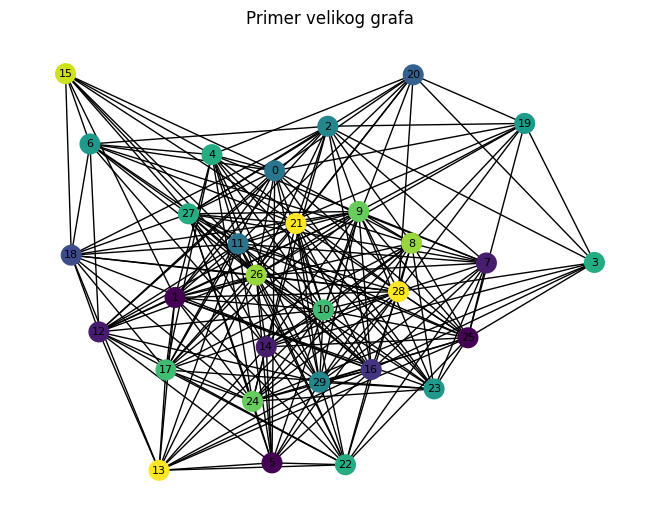

In [21]:
G = nx.erdos_renyi_graph(30,0.5)


population_size = 1000
num_generations = 100
tournament_size = 5
elitism_size = 2
mutation_prob = 0.1

best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
else:
    print("Resenje nije nadjeno")

G = nx.Graph(G)
node_colors = [best_solution.colors[node] for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
plt.title("Primer velikog grafa")
plt.show()

In [22]:
G = nx.erdos_renyi_graph(550,0.5)

In [27]:
population_size = 30
num_generations = 30
tournament_size = 5
elitism_size = 5
mutation_prob = 0.1

best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("Primer velikog grafa")
    plt.show()
else:
    print("Resenje nije nadjeno")
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))




415.0031545741325
415.0031545741325
411.0031545741325
399.0031545741325
375.0031545741325
363.0031545741325
359.0
335.4069400630915
329.0
303.0
289.05993690851733
285.05993690851733
273.0
267.05993690851733
259.0
259.0
253.05993690851736
251.05993690851736
243.53312302839117
239.53312302839117
237.53312302839117
235.53312302839117
233.53312302839117
233.53312302839117
233.53312302839117
231.5520504731861
231.5520504731861
231.5520504731861
229.5520504731861
229.5520504731861
Resenje nije nadjeno
Minimalno bojenje grafa: {0: 136, 1: 282, 2: 103, 3: 244, 4: 157, 5: 111, 6: 97, 7: 207, 8: 18, 9: 165, 10: 143, 11: 257, 12: 165, 13: 198, 14: 280, 15: 80, 16: 2, 17: 163, 18: 126, 19: 27, 20: 140, 21: 79, 22: 312, 23: 19, 24: 149, 25: 123, 26: 187, 27: 96, 28: 199, 29: 50, 30: 288, 31: 303, 32: 75, 33: 207, 34: 277, 35: 185, 36: 267, 37: 238, 38: 82, 39: 227, 40: 253, 41: 273, 42: 239, 43: 4, 44: 136, 45: 116, 46: 177, 47: 312, 48: 73, 49: 239, 50: 197, 51: 142, 52: 90, 53: 137, 54: 159, 55: 

In [26]:
min_colors, coloring = brute_force_algorithm(G)
print("Minimalan broj boja:", min_colors)
# print("Bojenje grafa:", coloring)

Minimalan broj boja: 80


In [29]:
import time

In [30]:
start_time = time.time()
min_colors, coloring = brute_force_algorithm(G)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

print("Minimalan broj boja:", min_colors)
print("Bojenje grafa:", coloring)

node_colors = [coloring[node] for node in G.nodes()]
pos = nx.spring_layout(G)  # Pozicije čvorova
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500)
plt.show()

Execution time: 0.3767697811126709 seconds
Minimalan broj boja: 80
Bojenje grafa: {0: 0, 1: 0, 2: 1, 3: 2, 4: 1, 5: 0, 6: 3, 7: 1, 8: 2, 9: 1, 10: 2, 11: 2, 12: 3, 13: 4, 14: 4, 15: 0, 16: 5, 17: 3, 18: 1, 19: 6, 20: 0, 21: 5, 22: 5, 23: 3, 24: 2, 25: 2, 26: 7, 27: 6, 28: 7, 29: 1, 30: 8, 31: 5, 32: 4, 33: 4, 34: 8, 35: 9, 36: 0, 37: 8, 38: 6, 39: 7, 40: 4, 41: 7, 42: 9, 43: 9, 44: 6, 45: 10, 46: 11, 47: 10, 48: 9, 49: 12, 50: 11, 51: 10, 52: 12, 53: 8, 54: 10, 55: 4, 56: 12, 57: 3, 58: 11, 59: 7, 60: 13, 61: 7, 62: 14, 63: 3, 64: 11, 65: 14, 66: 13, 67: 15, 68: 6, 69: 13, 70: 15, 71: 15, 72: 16, 73: 10, 74: 17, 75: 9, 76: 0, 77: 15, 78: 16, 79: 12, 80: 13, 81: 17, 82: 15, 83: 5, 84: 18, 85: 18, 86: 8, 87: 6, 88: 14, 89: 12, 90: 14, 91: 19, 92: 17, 93: 17, 94: 11, 95: 18, 96: 13, 97: 19, 98: 20, 99: 17, 100: 13, 101: 16, 102: 6, 103: 20, 104: 11, 105: 21, 106: 16, 107: 22, 108: 9, 109: 21, 110: 19, 111: 10, 112: 12, 113: 23, 114: 22, 115: 21, 116: 23, 117: 20, 118: 21, 119: 23, 120: 24

ModuleNotFoundError: No module named 'scipy'

In [31]:
G = nx.complete_graph(50)


population_size = 100
num_generations = 100
tournament_size = 5
elitism_size = 2
mutation_prob = 0.1

start_time = time.time()
best_solution = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

print("Minimalno bojenje grafa:", best_solution.colors)
print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

node_colors = [best_solution.colors[node] for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
plt.title("Primer potpuno povezanog grafa")
plt.show()

31.020408163265305
27.020408163265305
25.020408163265305
23.020408163265305
21.020408163265305
19.0
17.020408163265305
17.0
15.020408163265307
15.020408163265307
11.020408163265307
11.020408163265307
11.020408163265307
11.020408163265307
9.020408163265307
7.020408163265306
5.020408163265306
5.020408163265306
5.020408163265306
3.020408163265306
3.020408163265306
3.020408163265306
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.0204081632653061
1.02040816

AttributeError: 'tuple' object has no attribute 'colors'

Execution time: 171.48567390441895 seconds
Minimalno bojenje grafa: {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 1, 'F': 2, 'G': 3, 'H': 1, 'I': 2, 'J': 3, 'K': 4, 'L': 5, 'M': 8, 'N': 4, 'O': 5, 'P': 3, 'Q': 4, 'R': 5, 'S': 3, 'T': 4, 'U': 5, 'V': 6, 'W': 23, 'X': 13, 'Y': 5, 'Z': 6}
Broj korišćenih boja: 9


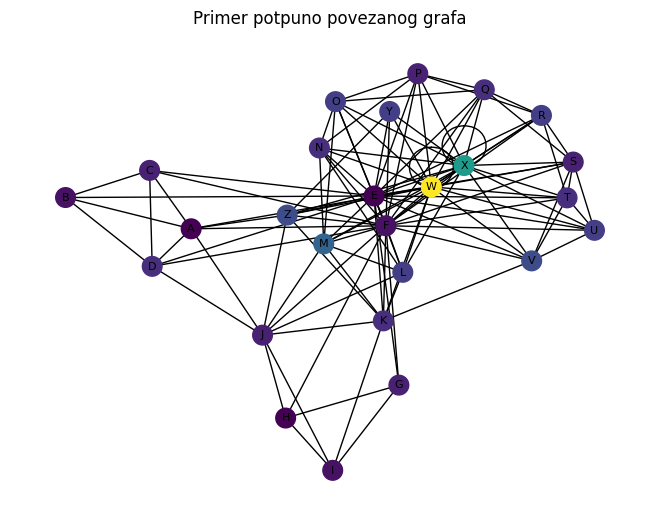

In [21]:
graph = {
    'A': ['B', 'C', 'D', 'J', 'W', 'Z', 'F'],
    'B': ['C', 'A', 'E', 'D'],
    'C': ['B', 'E', 'F', 'A', 'D'],
    'D': ['A', 'E', 'B', 'C', 'F'],
    'E': ['F', 'D', 'B', 'C', 'G'],
    'F': ['E', 'G', 'C', 'D', 'H', 'J', 'K', 'L'],
    'G': ['H', 'F', 'E', 'I'],
    'H': ['I', 'F', 'G', 'J'],
    'I': ['H', 'G', 'J', 'K'],
    'J': ['H', 'I', 'A', 'K', 'F', 'D', 'Z', 'M'],
    'K': ['L', 'I', 'J', 'M', 'F', 'E', 'W', 'V'],
    'L': ['K', 'J', 'M', 'N', 'F', 'E', 'W', 'X'],
    'M': ['K', 'N', 'L', 'O', 'F', 'E', 'W', 'X'],
    'N': ['M', 'L', 'O', 'P', 'F', 'E', 'W', 'X'],
    'O': ['N', 'M', 'P', 'Q', 'F', 'E', 'W', 'X'],
    'P': ['O', 'N', 'Q', 'R', 'F', 'E', 'W', 'X'],
    'Q': ['R', 'P', 'O', 'S', 'F', 'E', 'W', 'X'],
    'R': ['Q', 'P', 'S', 'T', 'F', 'E', 'W', 'X'],
    'S': ['R', 'Q', 'T', 'U', 'F', 'E', 'W', 'X'],
    'T': ['S', 'R', 'U', 'V', 'F', 'E', 'W', 'X'],
    'U': ['V', 'T', 'S', 'W', 'F', 'E', 'W', 'X'],
    'V': ['U', 'T', 'S', 'X', 'F', 'E', 'W', 'X'],
    'W': ['V', 'U', 'X', 'Y', 'F', 'E', 'W', 'X'],
    'X': ['W', 'V', 'Y', 'Z', 'F', 'E', 'W', 'X'],
    'Y': ['X', 'W', 'Z', 'F', 'E', 'W', 'X'],
    'Z': ['Y', 'X', 'J', 'F', 'E', 'W', 'K']
}

population_size = 100
num_generations = 5000
tournament_size = 5
elitism_size = 2
mutation_prob = 0.1

start_time = time.time()
best_solution = ga(graph, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

print("Minimalno bojenje grafa:", best_solution.colors)
print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

G = nx.Graph(graph)
node_colors = [best_solution.colors[node] for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
plt.title("Primer potpuno povezanog grafa")
plt.show()

Graph nodes: 250
Graph edges: 15668
Minimalan broj boja: 2
Bojenje grafa: {'e': 0, '2': 1, '3': 1, '5': 1, '6': 1, '7': 1, '8': 1, '9': 1, '10': 1, '11': 1, '12': 1, '13': 1, '14': 1, '15': 1, '16': 1, '17': 1, '18': 1, '19': 1, '20': 1, '21': 1, '22': 1, '23': 1, '24': 1, '25': 1, '26': 1, '27': 1, '28': 1, '29': 1, '30': 1, '31': 1, '32': 1, '33': 1, '34': 1, '35': 1, '36': 1, '37': 1, '38': 1, '39': 1, '40': 1, '41': 1, '42': 1, '43': 1, '44': 1, '45': 1, '46': 1, '47': 1, '48': 1, '49': 1, '50': 1, '51': 1, '52': 1, '53': 1, '54': 1, '55': 1, '56': 1, '57': 1, '58': 1, '59': 1, '60': 1, '61': 1, '62': 1, '63': 1, '64': 1, '65': 1, '66': 1, '67': 1, '68': 1, '69': 1, '70': 1, '71': 1, '72': 1, '73': 1, '74': 1, '75': 1, '76': 1, '77': 1, '78': 1, '79': 1, '80': 1, '81': 1, '82': 1, '83': 1, '84': 1, '85': 1, '86': 1, '87': 1, '88': 1, '89': 1, '90': 1, '91': 1, '92': 1, '93': 1, '94': 1, '95': 1, '96': 1, '97': 1, '98': 1, '99': 1, '100': 1, '101': 1, '102': 1, '103': 1, '104': 1, '

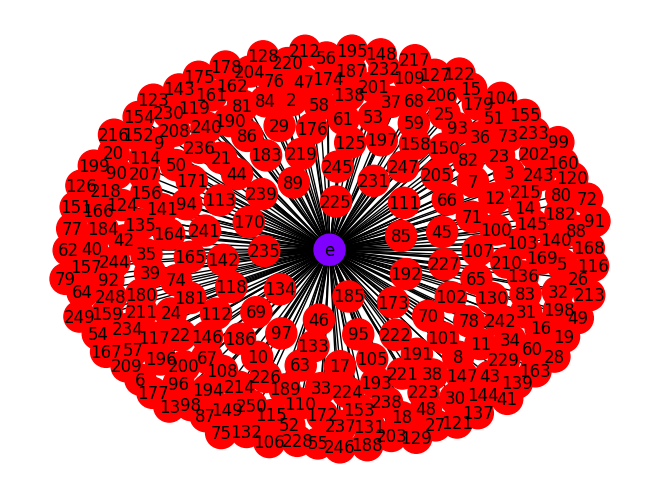

In [49]:
filename = 'test1'


def read_dimacs(filename):
    G = nx.Graph()
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('e'):
                _, node1, node2 = line.strip().split()
                node1, node2 = int(node1), int(node2)
                G.add_edge(node1, node2)
    return G

G = read_dimacs(filename)

print("Graph nodes:", len(G.nodes()))
print("Graph edges:", len(G.edges()))


min_colors, coloring = brute_force_algorithm(graph)
print("Minimalan broj boja:", min_colors)
print("Bojenje grafa:", coloring)

G = nx.Graph(graph)
node_colors = [coloring[node] for node in G.nodes()]
pos = nx.spring_layout(G)  # Pozicije čvorova
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500)
plt.show()

In [35]:
def read_graph(filename):
    graph = {}
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('e'):
                _, node, connected_node = line.strip().split()
                node = int(node)
                connected_node = int(connected_node)
                if node in graph:
                    graph[node].append(connected_node)
                else:
                    graph[node] = [connected_node]
    return graph

filename = 'test1'  # Update this with your file name
graph = read_graph(filename)
# print(graph)

population_size = 100
num_generations = 5000
tournament_size = 5
elitism_size = 2
mutation_prob = 0.1

start_time = time.time()
best_solution = ga(graph, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

print("Minimalno bojenje grafa:", best_solution.colors)
print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

G = nx.Graph(graph)
node_colors = [best_solution.colors[node] for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
plt.title("Primer potpuno povezanog grafa")
plt.show()

KeyError: 1